In [1]:
import os
os.environ["JAX_PLATFORM_NAME"] = "cpu"

import jax
print("JAX device:", jax.devices())
jax.config.update('jax_disable_jit', False) # Turn off JIT because of an issue in shortwave_radiation.py:169
jax.config.update("jax_debug_infs", True) # doesn't add any time since the saved time is otherwise spent getting the nodal quantities
jax.config.update("jax_debug_nans", False) # some physics fields might be nan

JAX device: [CpuDevice(id=0)]


In [2]:
import sys
sys.path.append(os.path.abspath(".."))
from jcm.model import Model, get_coords
from jcm.boundaries import initialize_boundaries

realistic_boundaries = lambda coords=get_coords(): initialize_boundaries(
    '../jcm/data/bc/t30/clim/boundaries_daily.nc',
    coords.horizontal,
)

In [3]:
model = Model(
    save_interval=3,
    total_time=36,
    # boundaries=realistic_boundaries(),
)
state = model.get_initial_state()
final_state, predictions = model.unroll(state)

In [4]:
pred_ds = model.predictions_to_xarray(predictions)

In [5]:
print(f"dataset size: {pred_ds.nbytes/1e6:.1f}MB")

dataset size: 44.0MB


In [13]:
pred_ds.coords
pred_ds['u_wind'].attrs

{'units': 'm/s'}

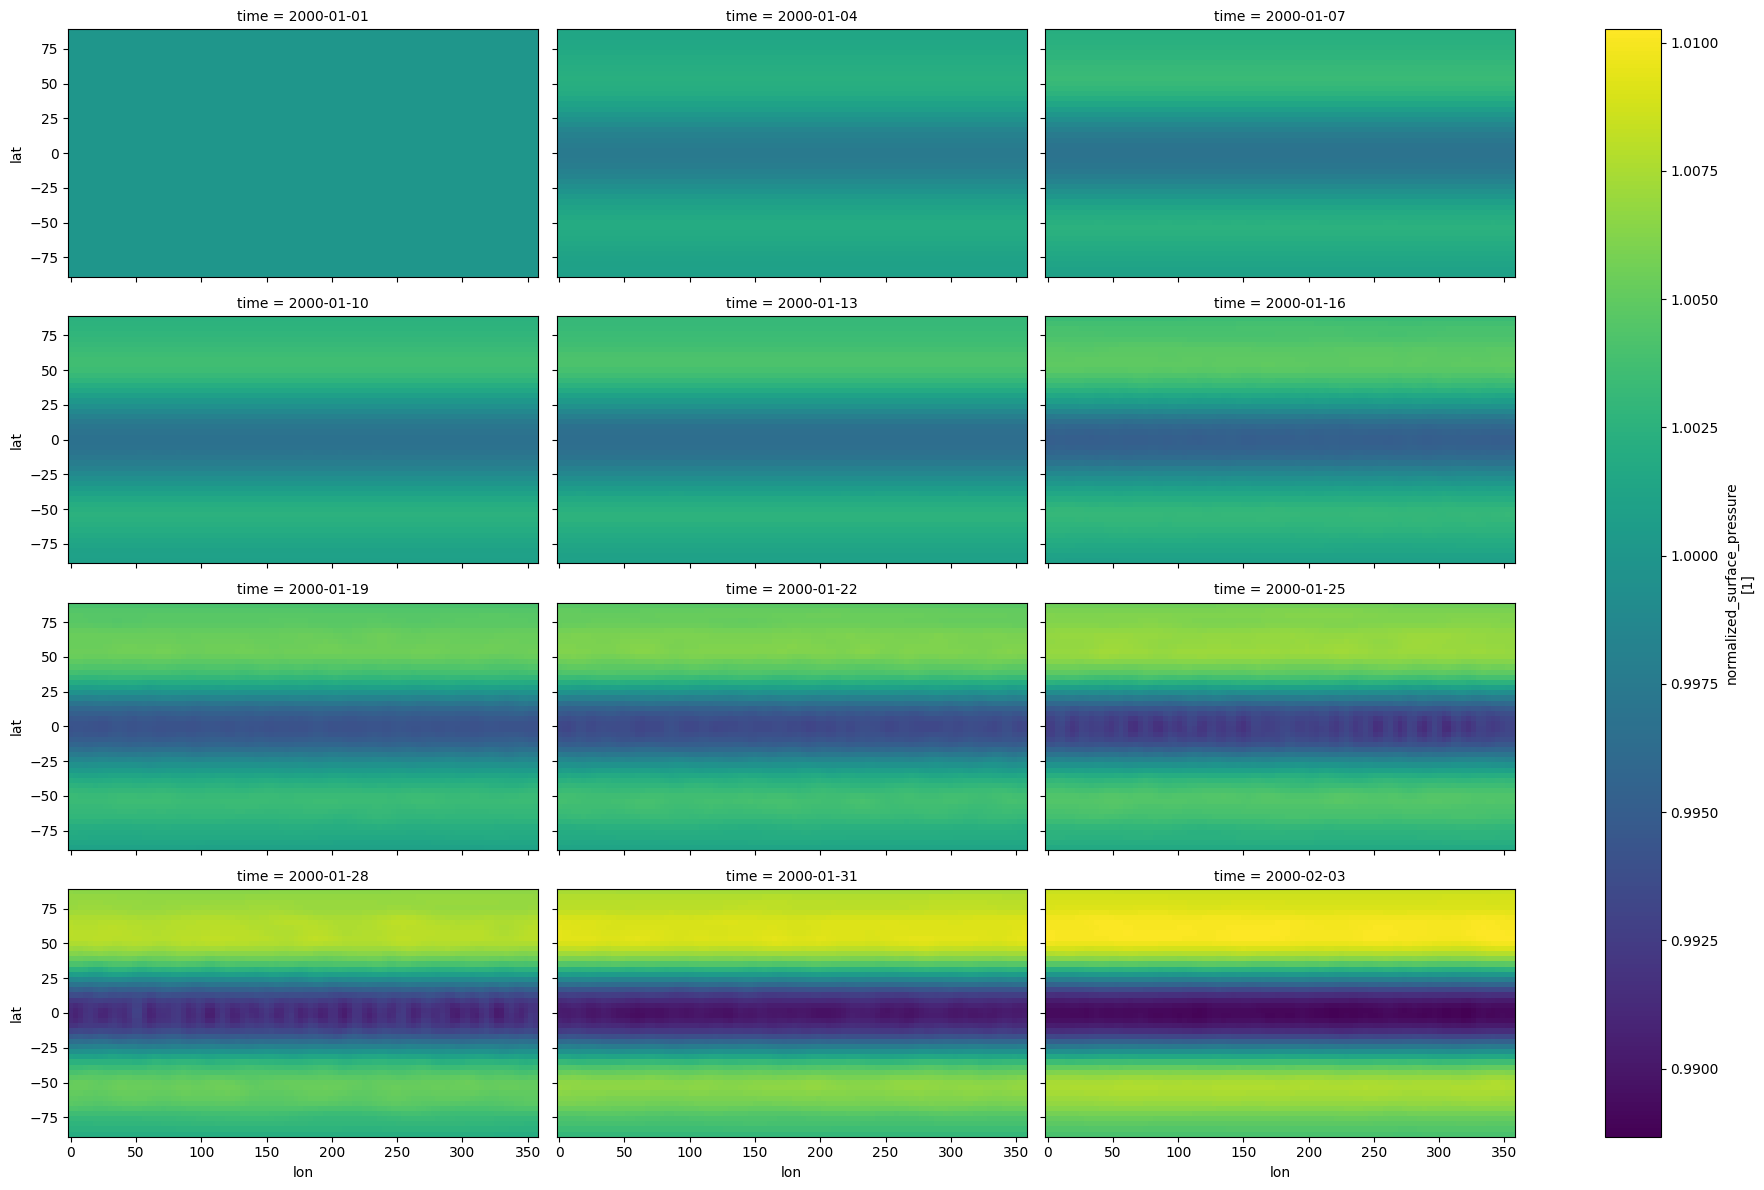

In [7]:
pred_ds['normalized_surface_pressure'].plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2);

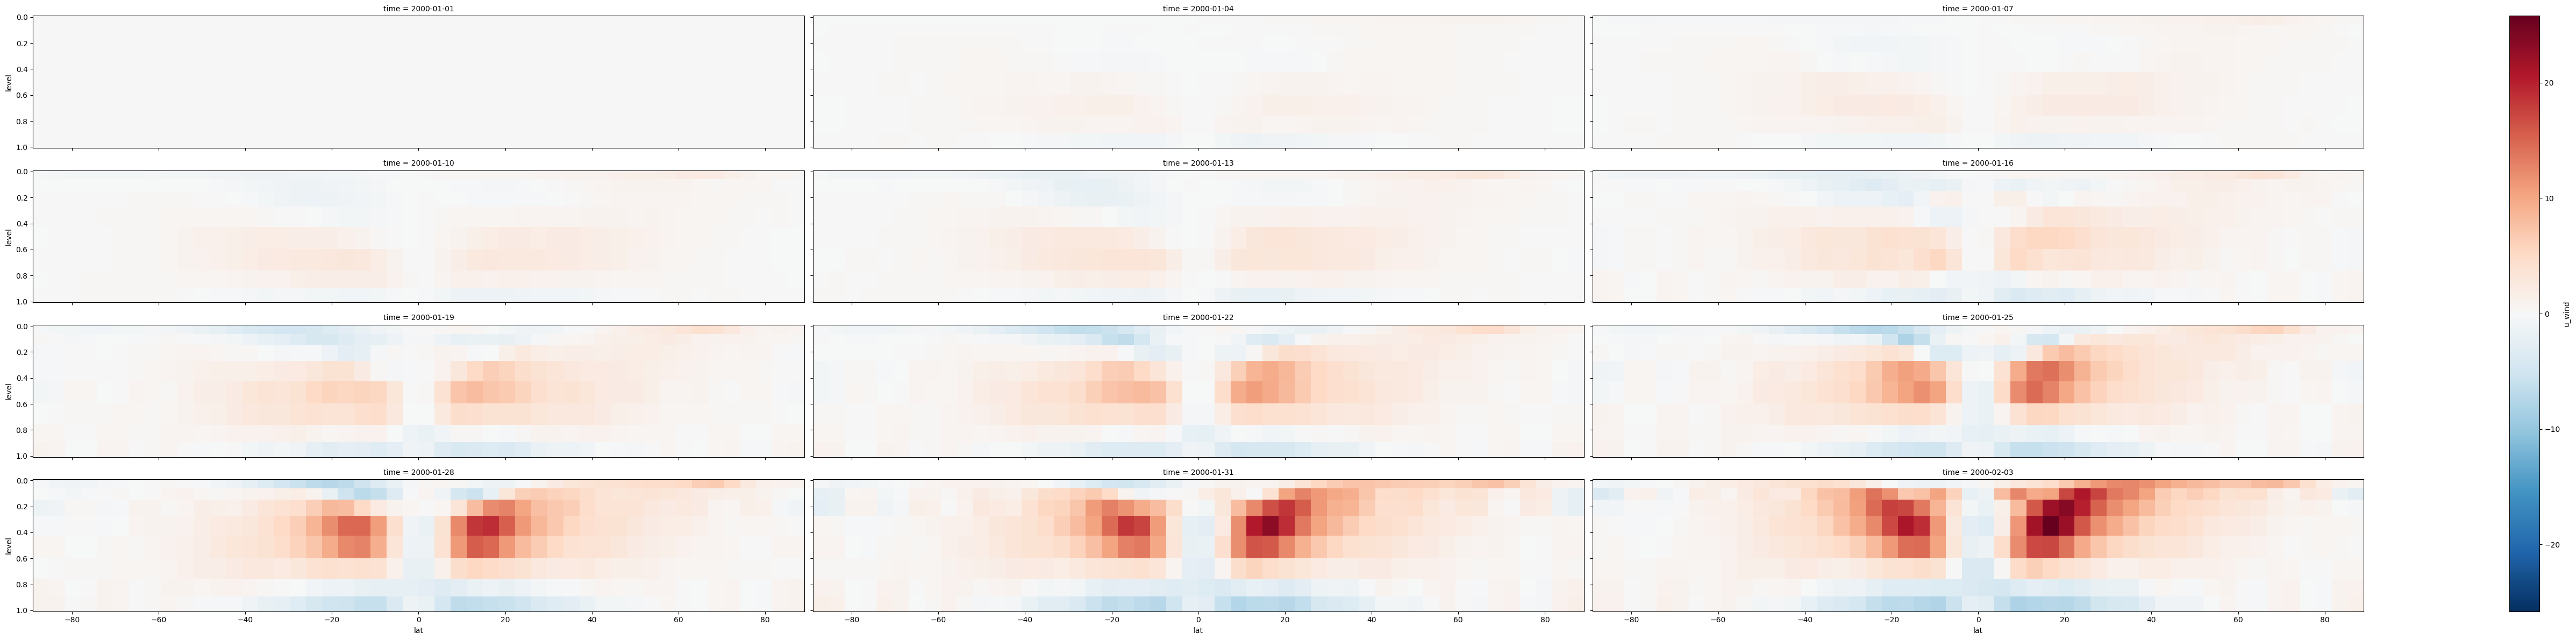

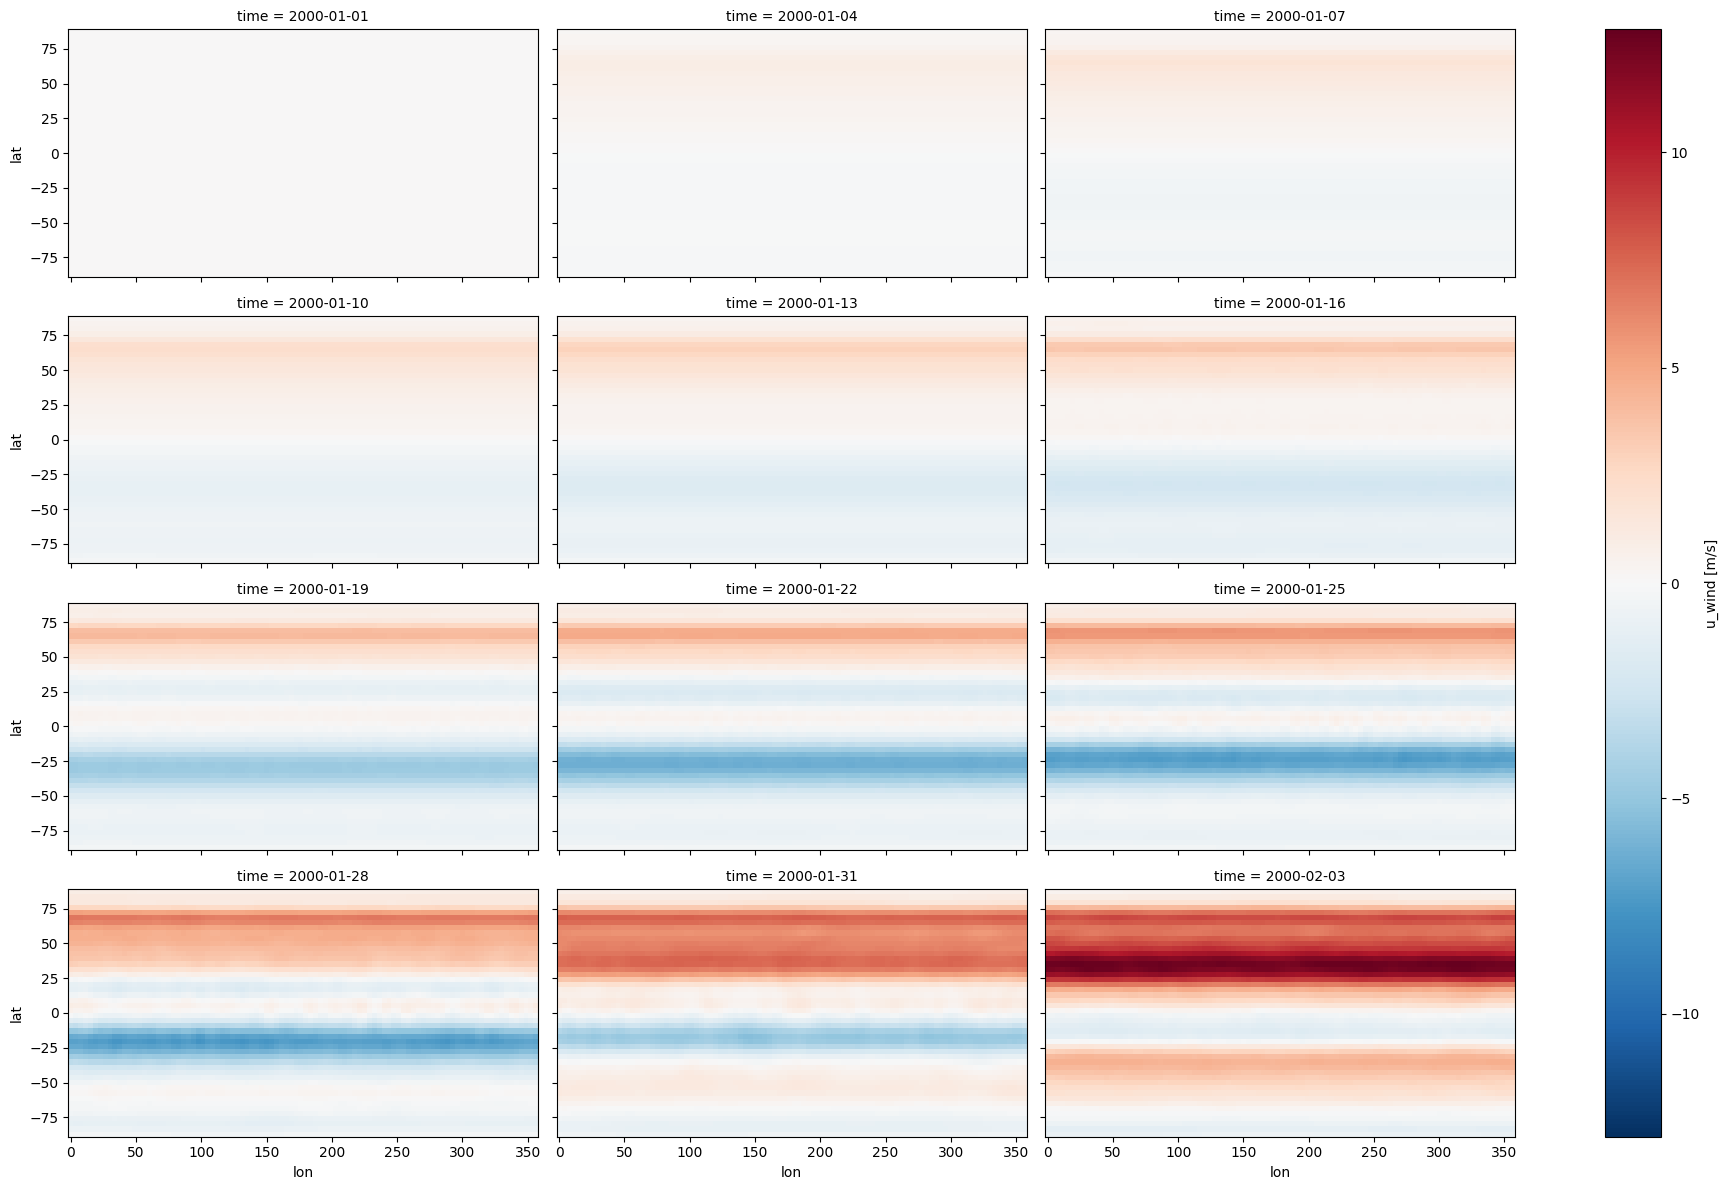

In [8]:
pred_ds['u_wind'].mean('lon').plot(x='lat', y='level', col='time', col_wrap=3, aspect=6, yincrease=False);
pred_ds['u_wind'].isel(level=-1).plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2);

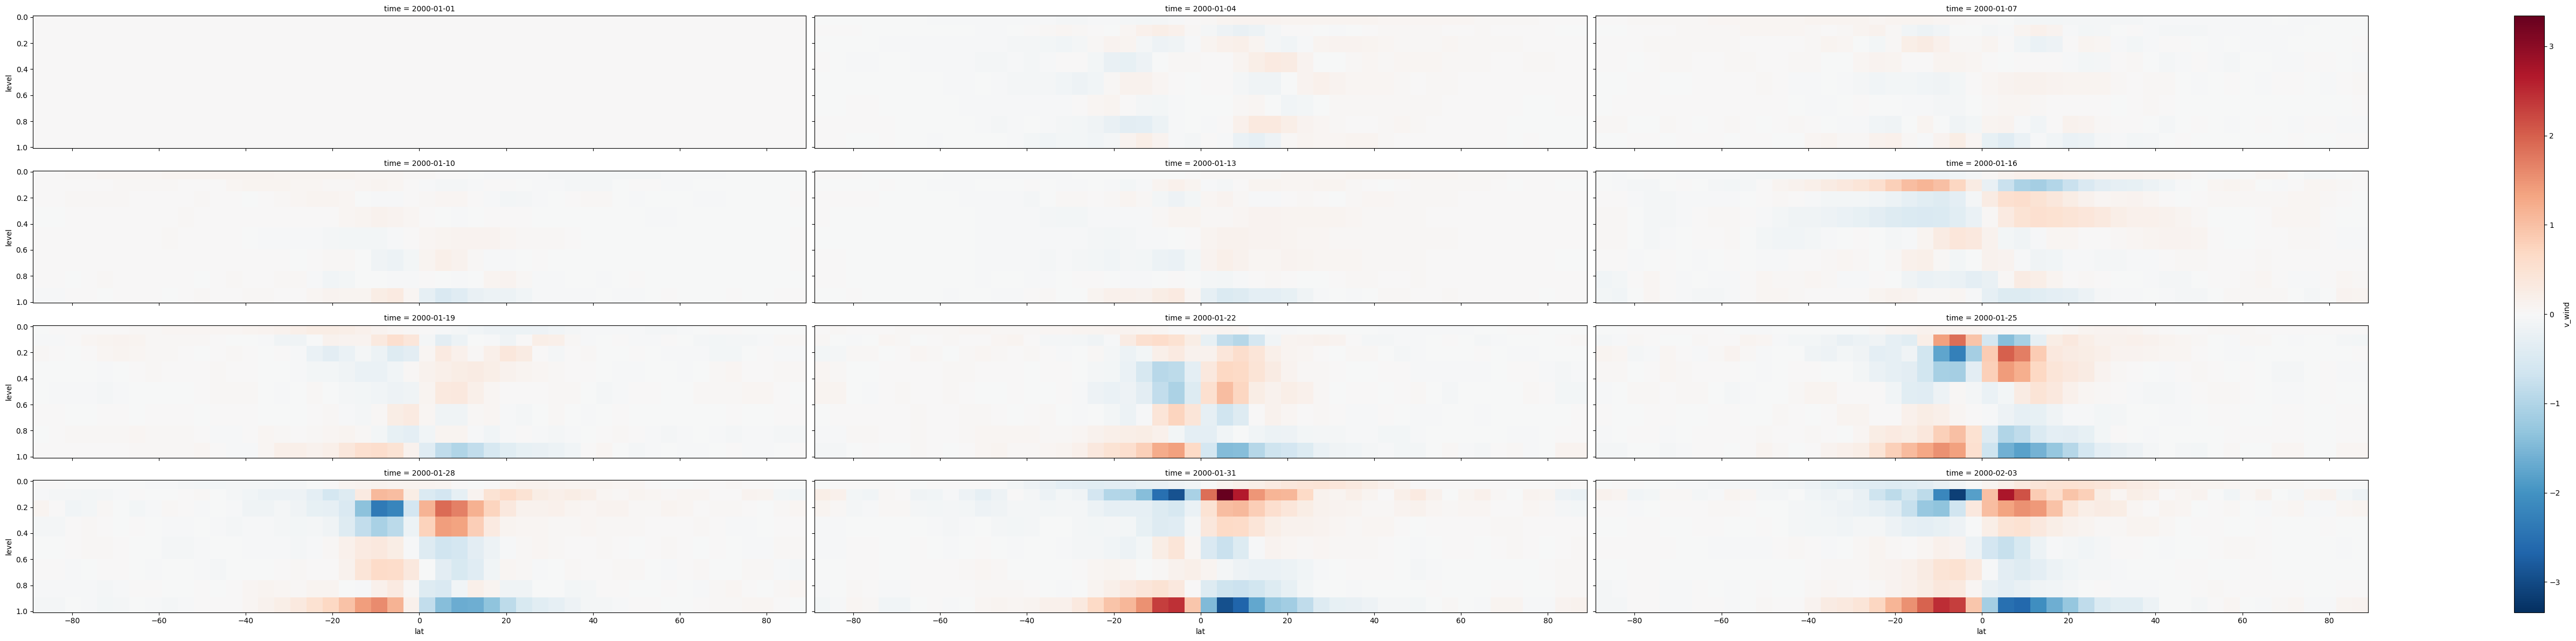

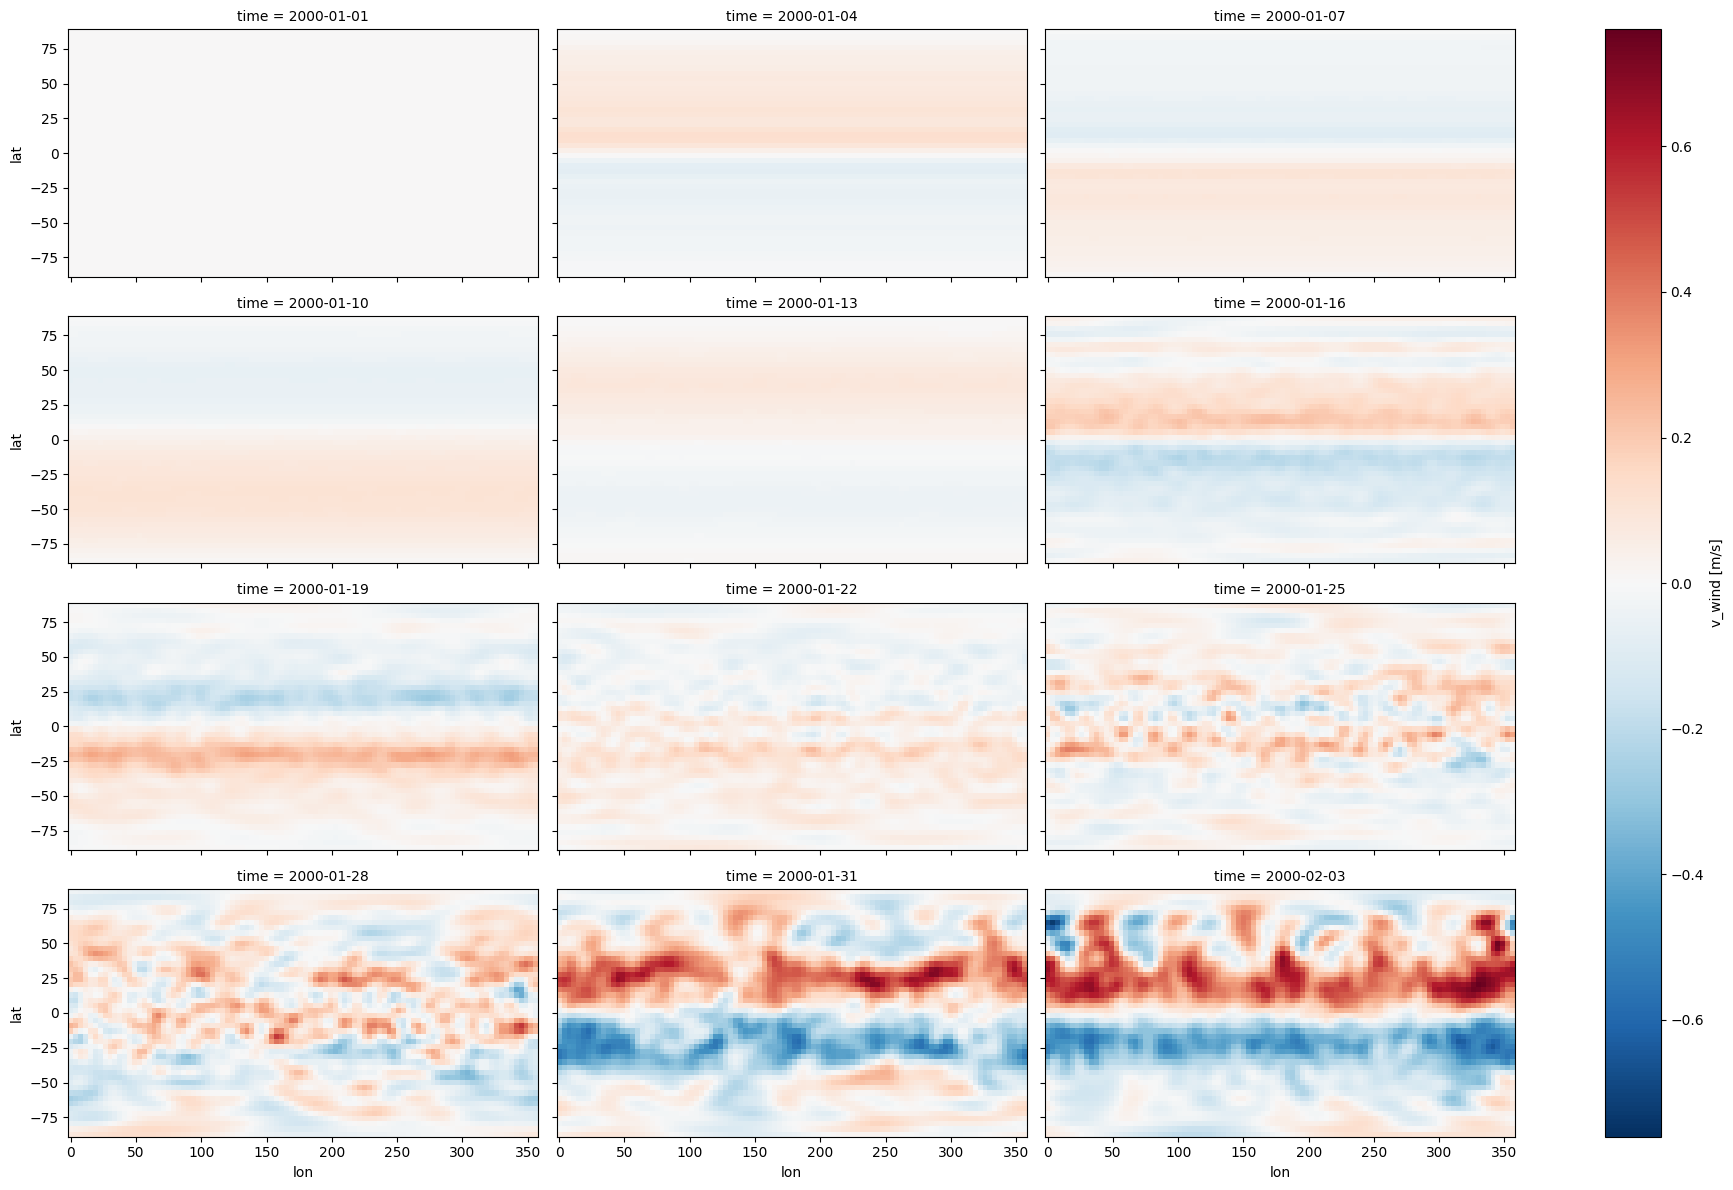

In [9]:
pred_ds['v_wind'].mean('lon').plot(x='lat', y='level', col='time', col_wrap=3, aspect=6, yincrease=False);
pred_ds['v_wind'].isel(level=-1).plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2);

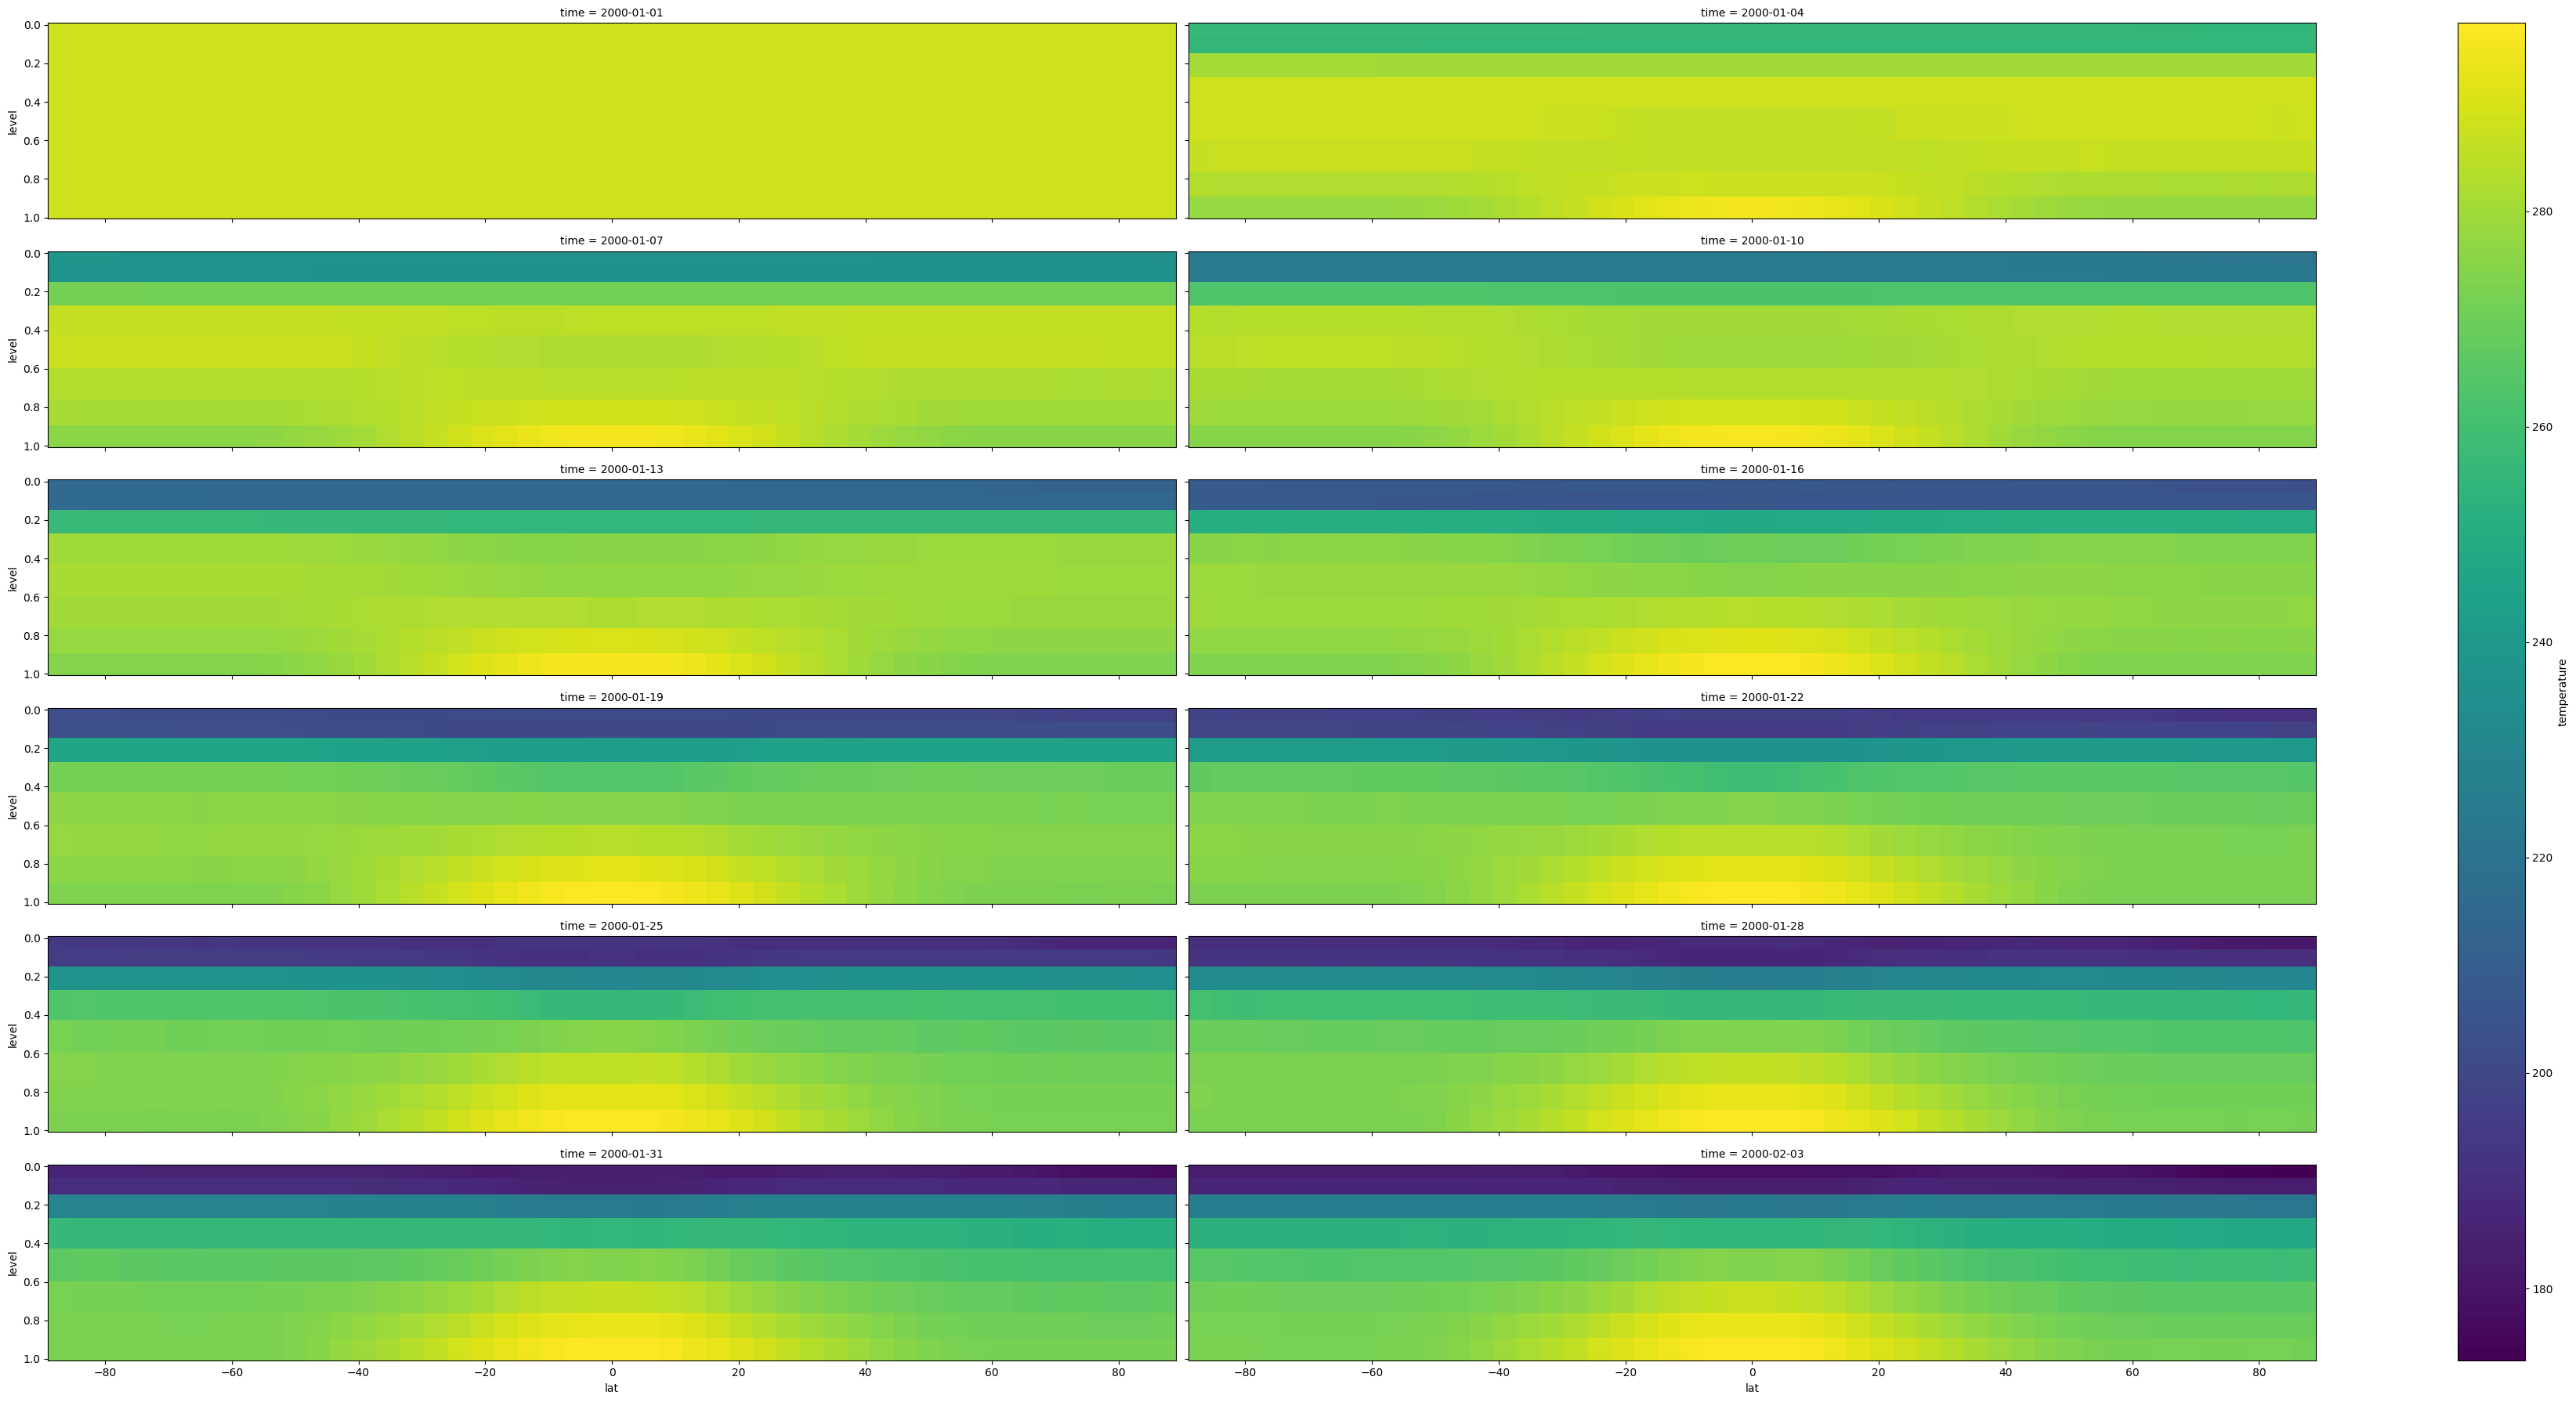

In [10]:
pred_ds['temperature'].mean('lon').plot(x='lat', y='level', col='time', col_wrap=2, aspect=6, yincrease=False);

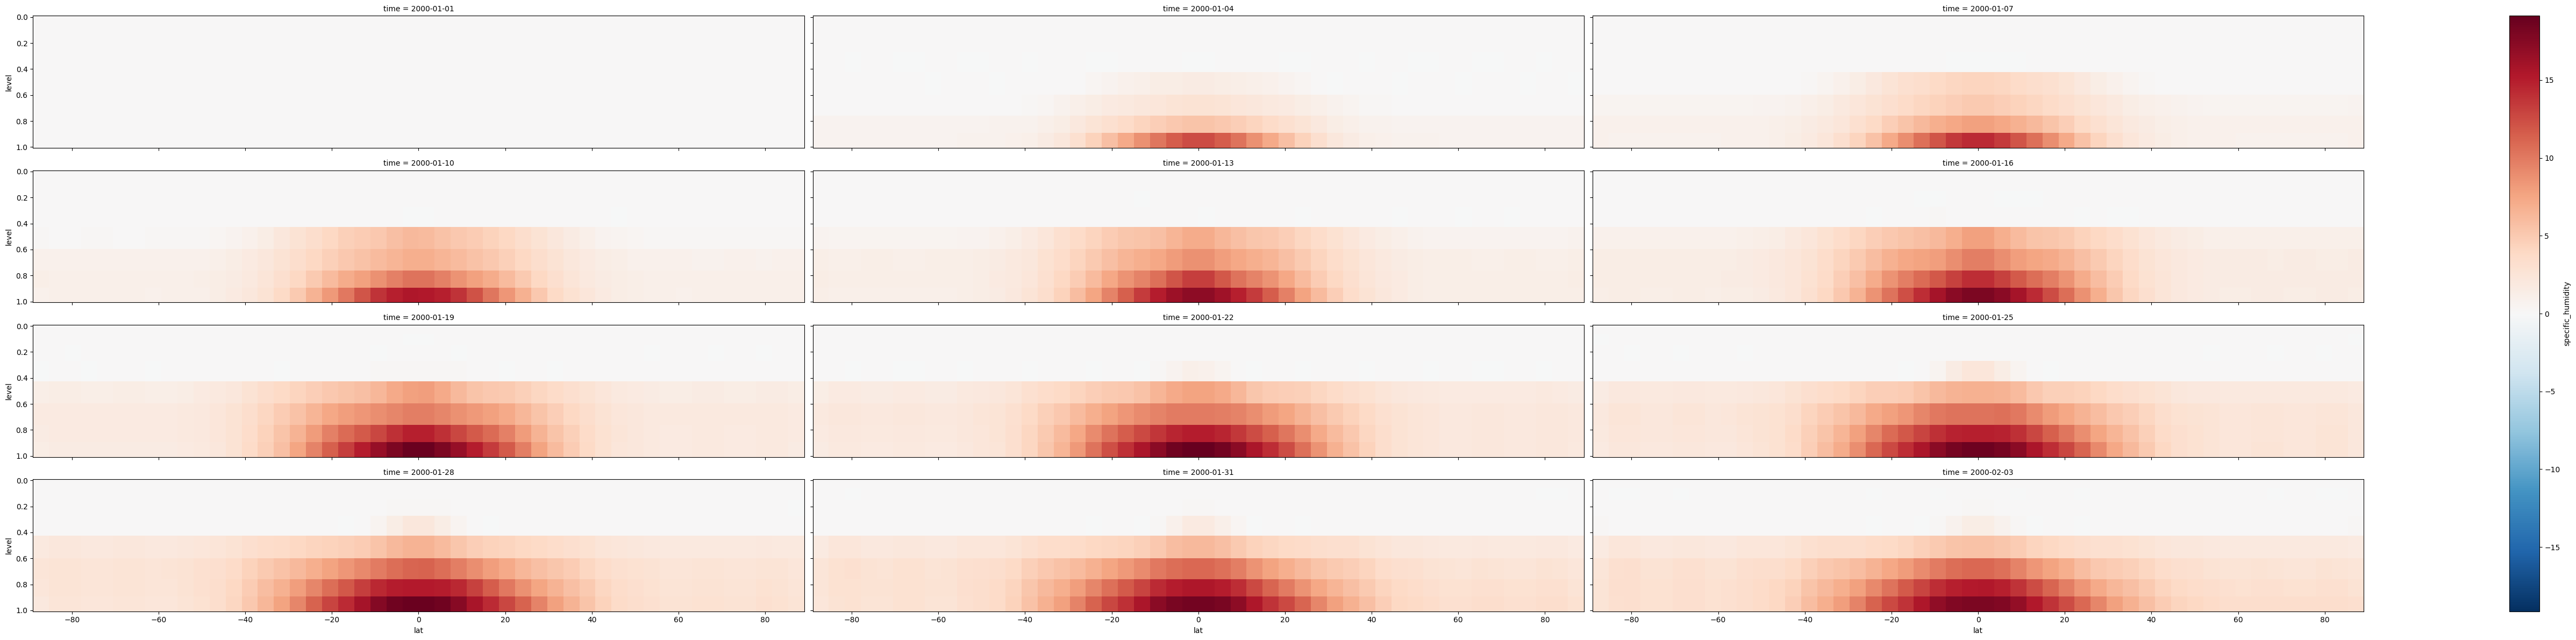

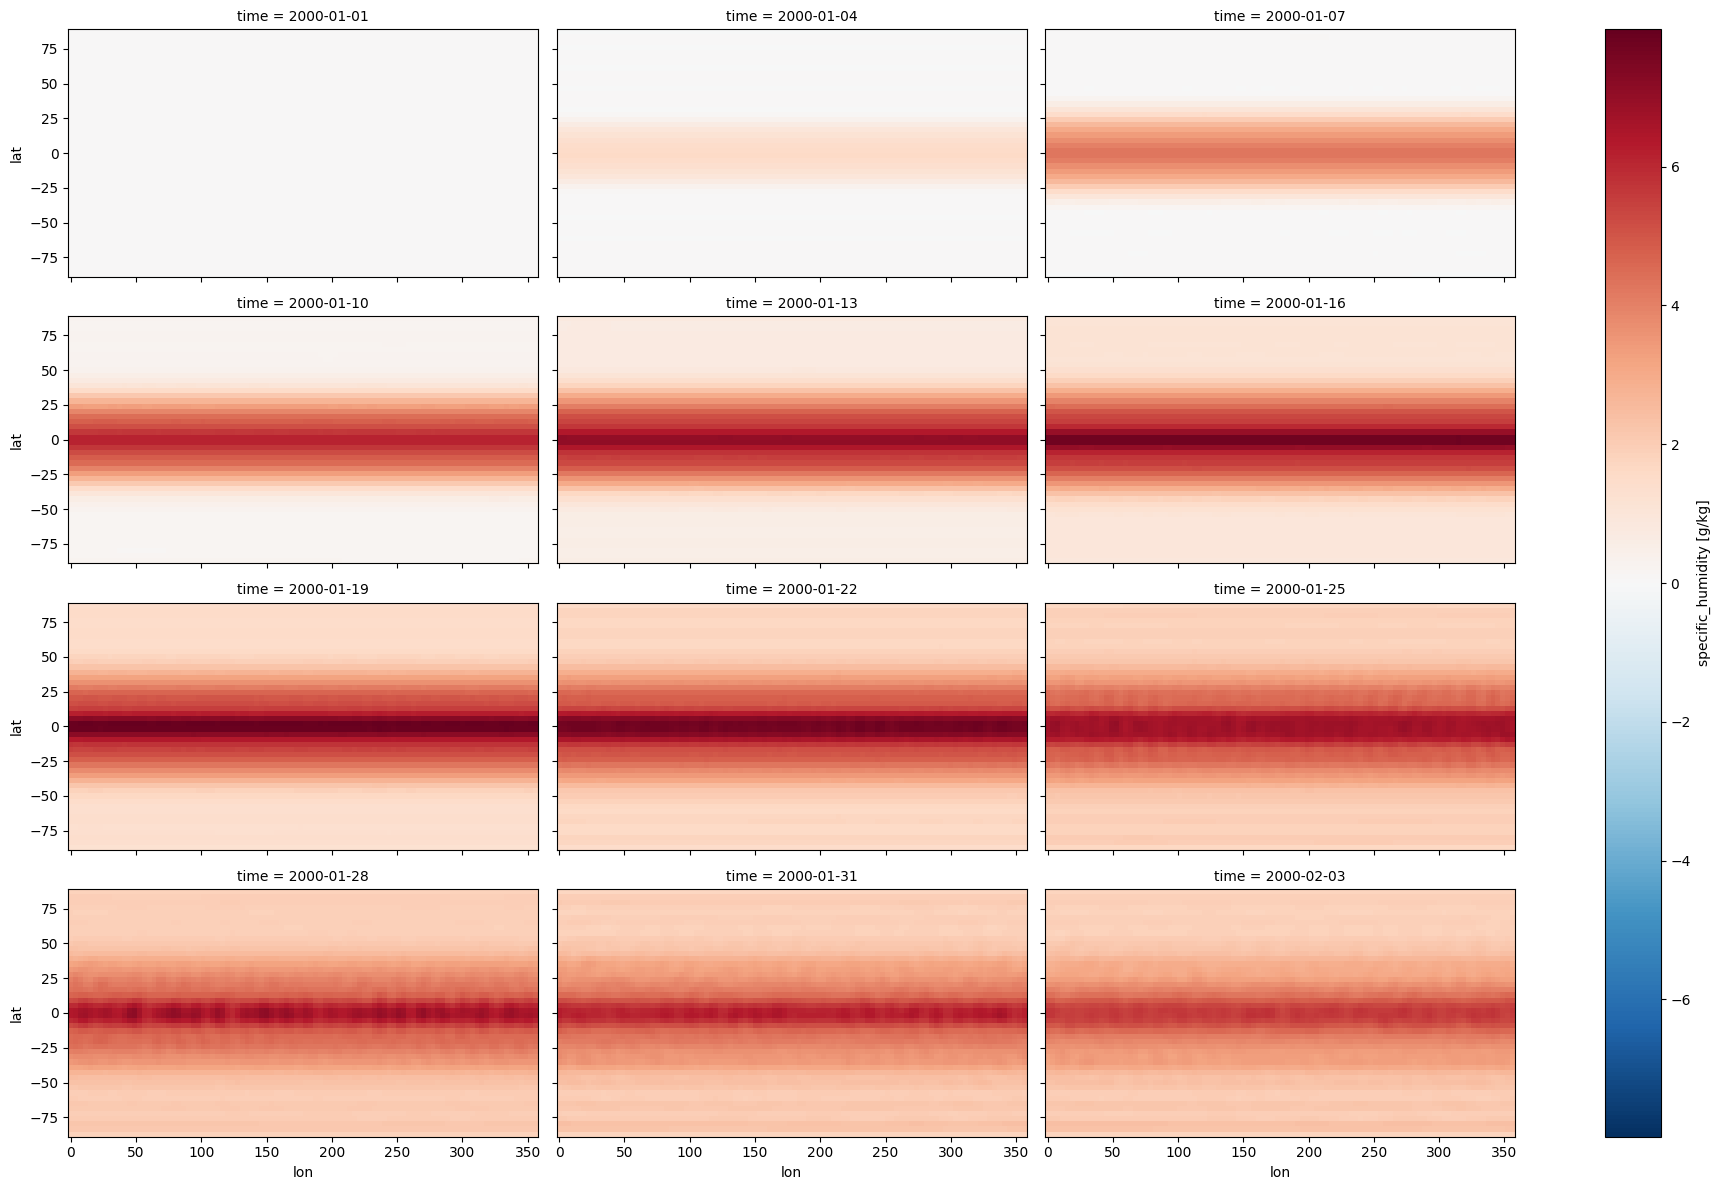

In [11]:
pred_ds['specific_humidity'].mean('lon').plot(x='lat', y='level', col='time', col_wrap=3, aspect=6, yincrease=False);
pred_ds['specific_humidity'].isel(level=3).plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2);

### clouds!

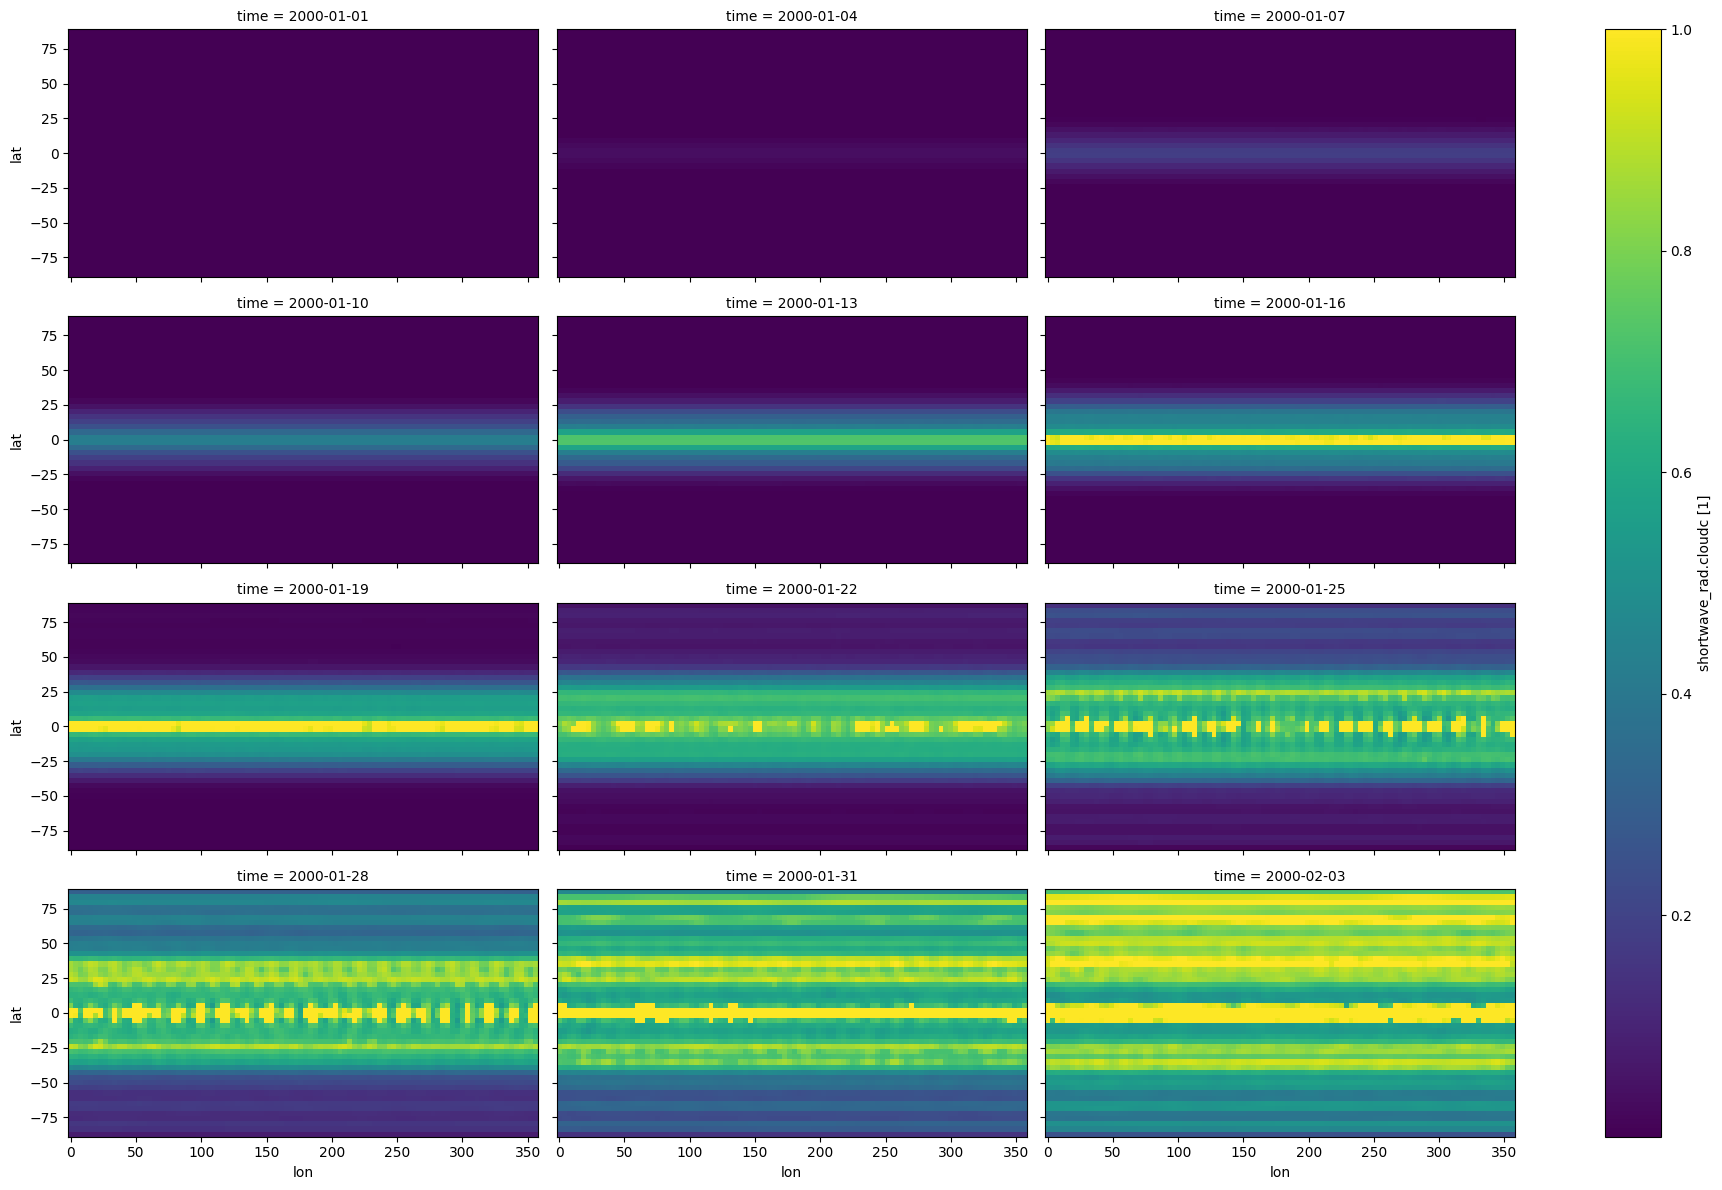

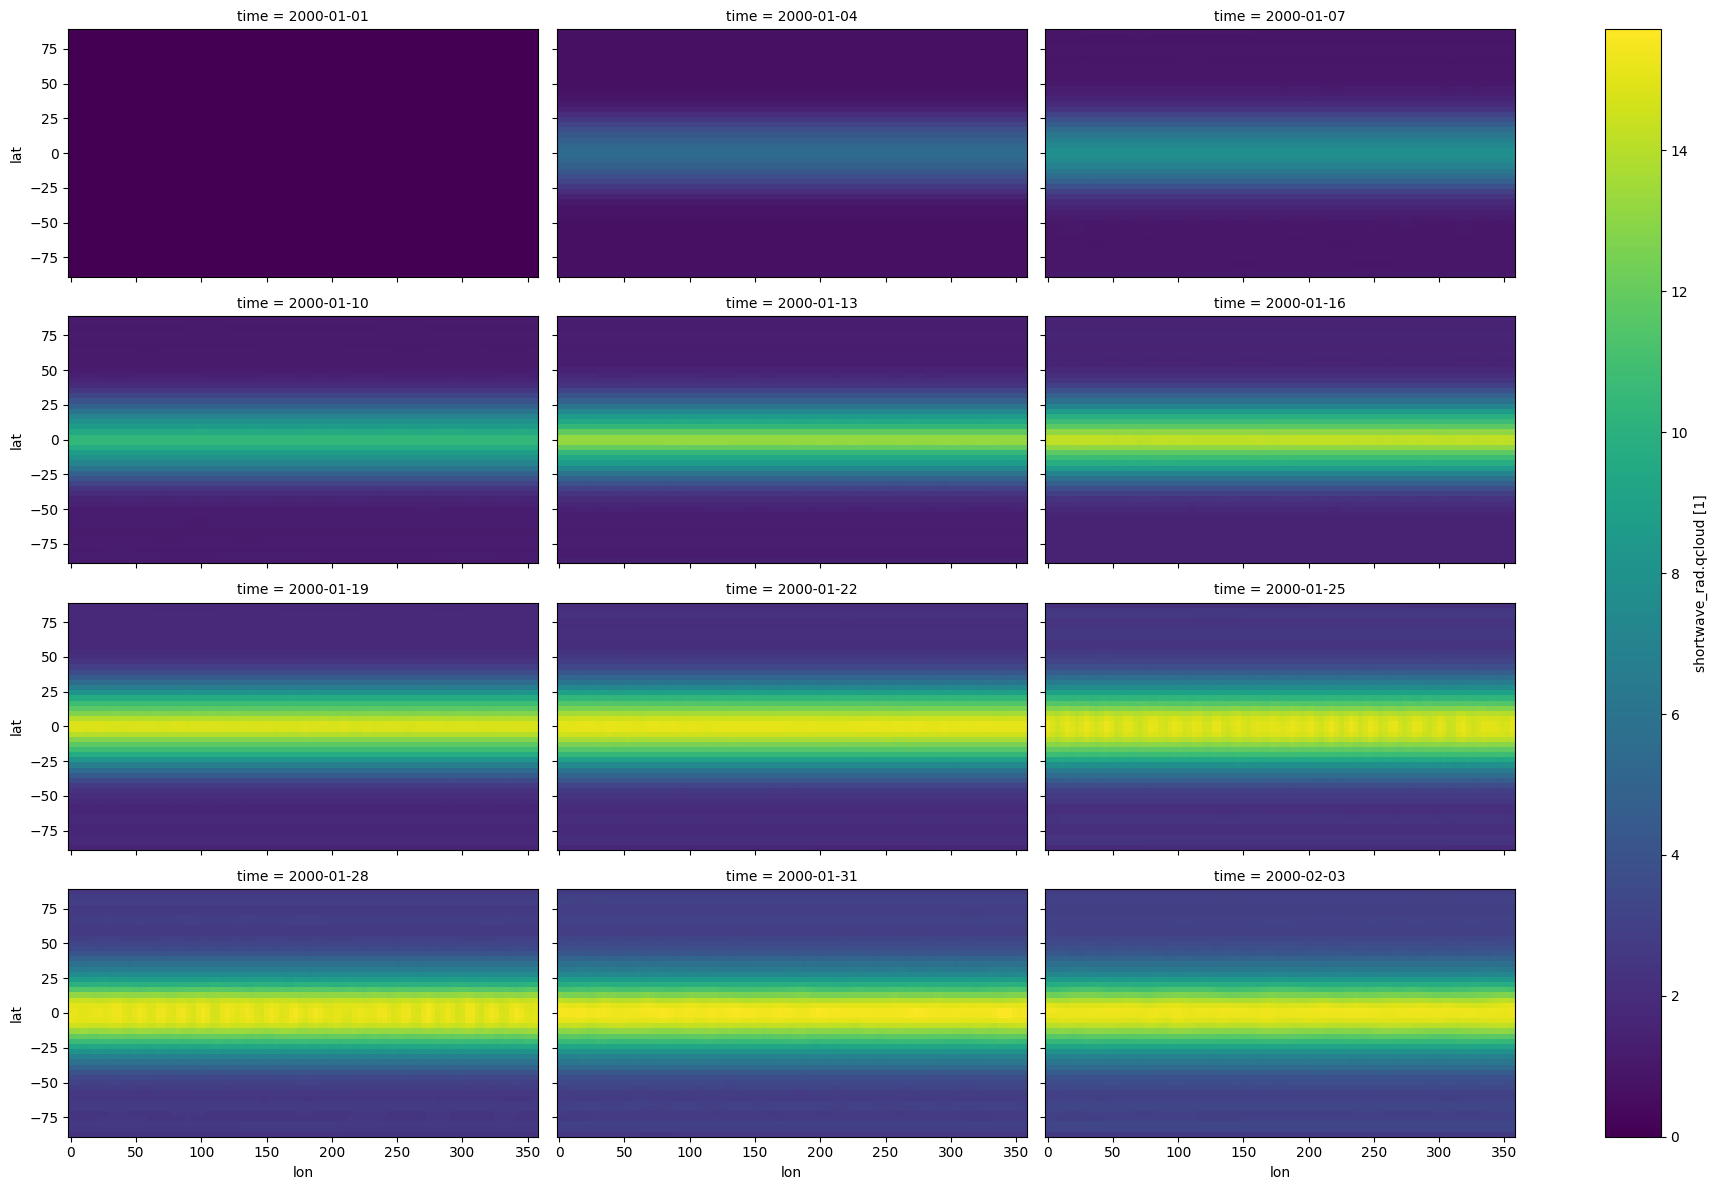

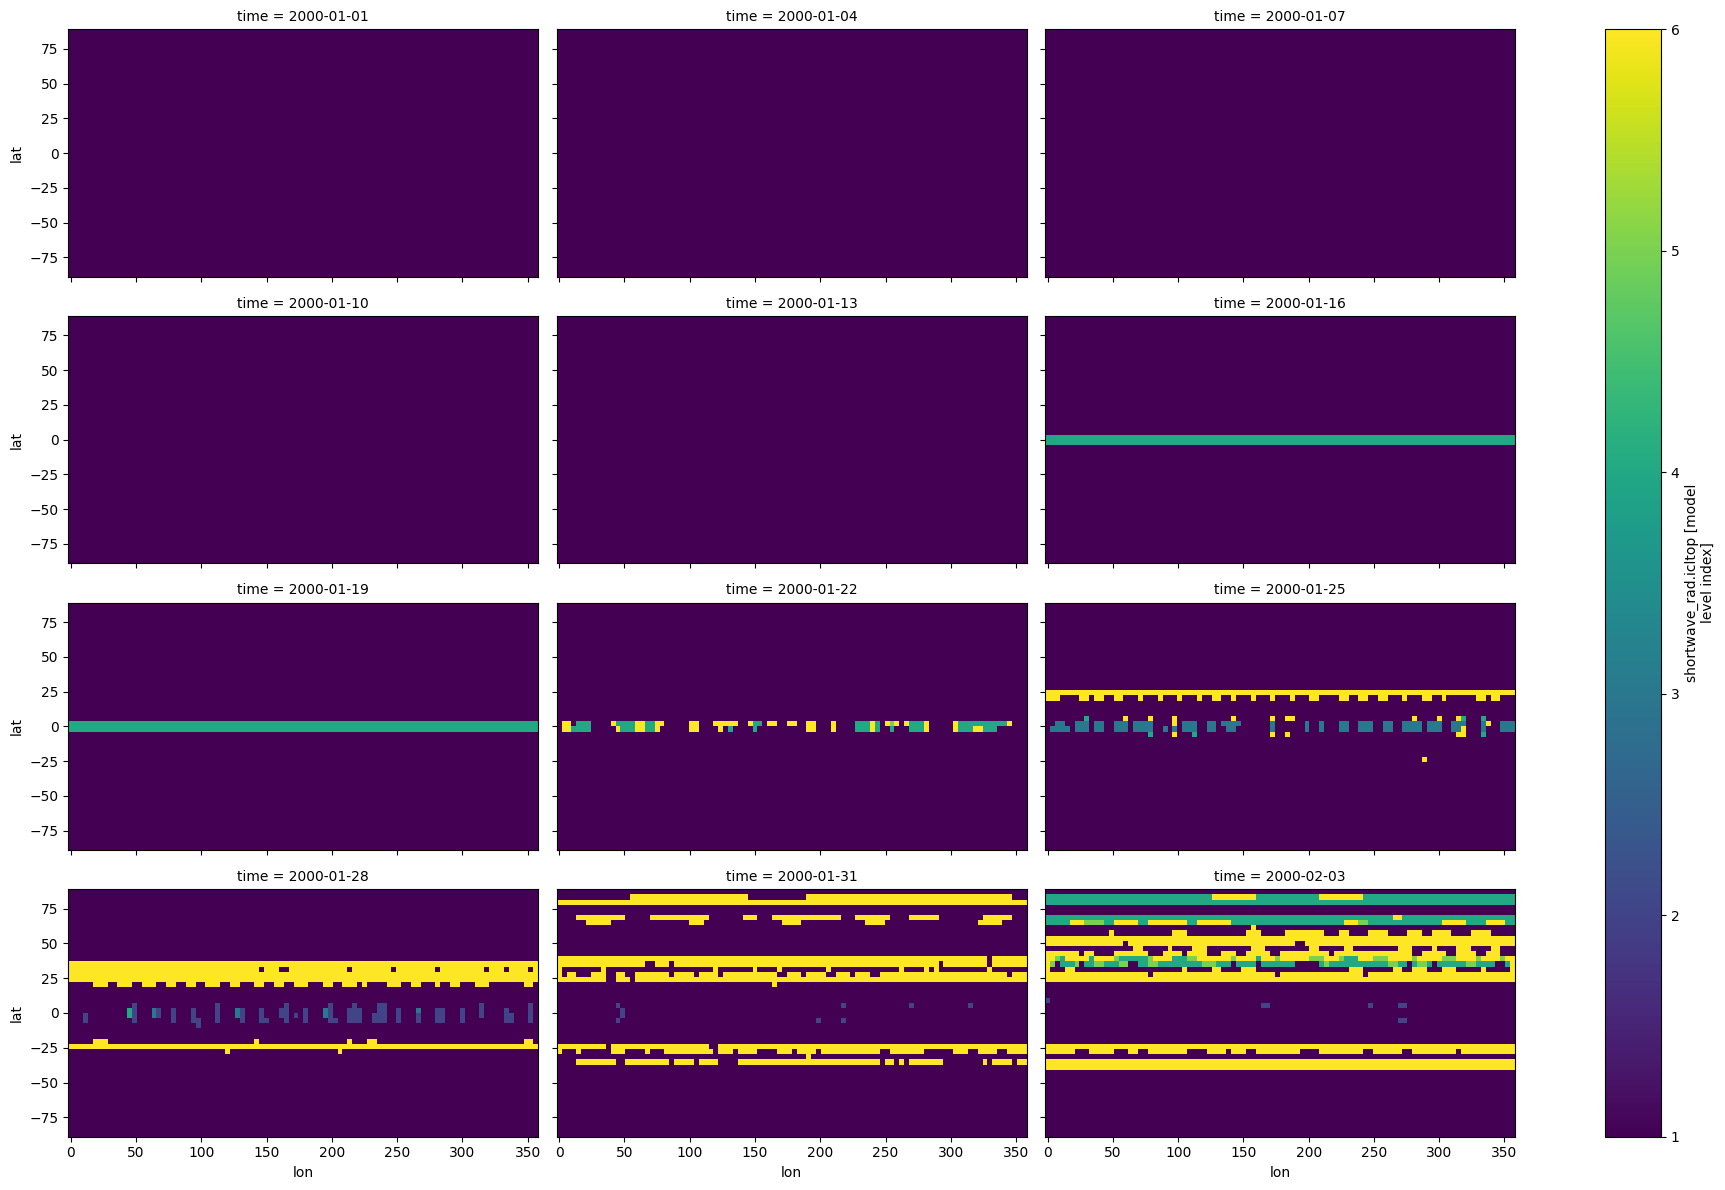

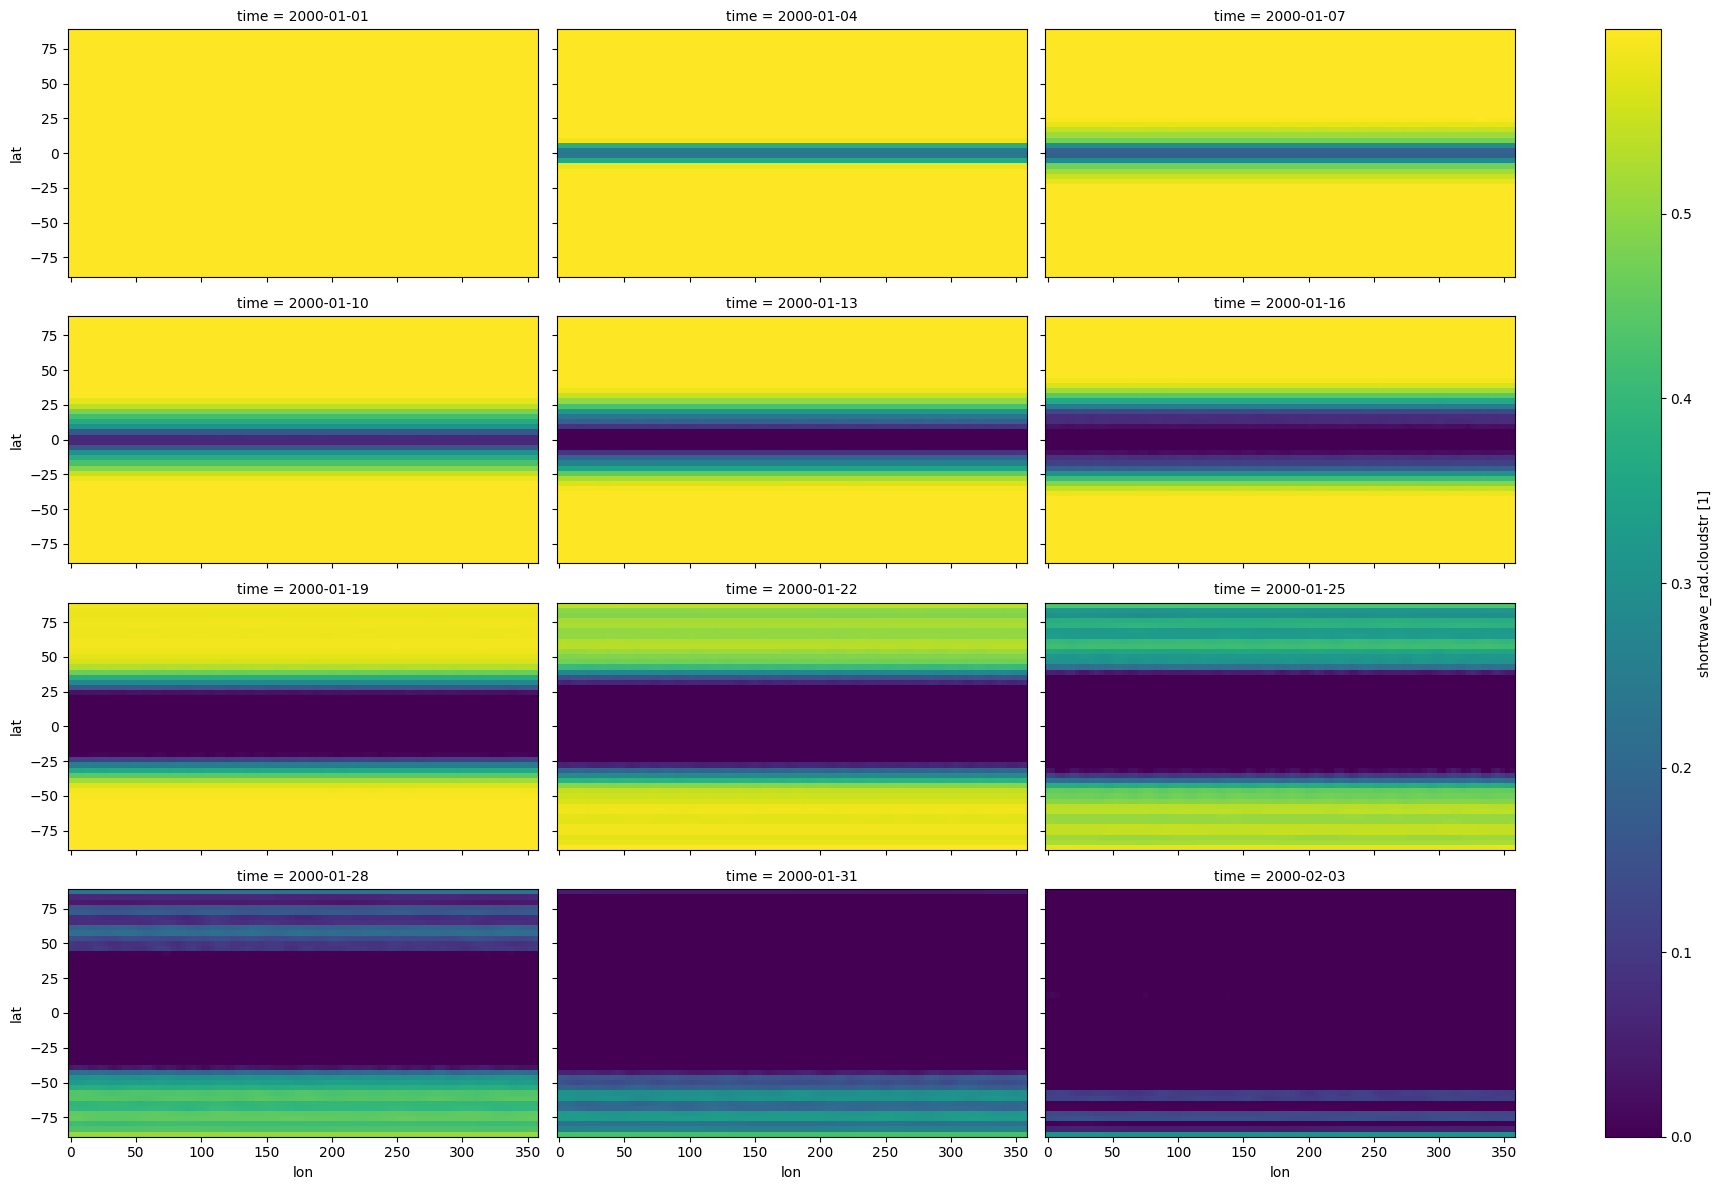

In [12]:
pred_ds['shortwave_rad.cloudc'].plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2);
pred_ds['shortwave_rad.qcloud'].plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2);
pred_ds['shortwave_rad.icltop'].plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2);
pred_ds['shortwave_rad.cloudstr'].plot(x='lon', y='lat', col='time', col_wrap=3, aspect=2);